### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load Dataset

In [2]:
data = pd.read_csv('mail_data.csv')
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
# from sklearn.feature_extraction import TfidfVectorizer

In [4]:
data.shape

(5572, 2)

In [5]:
data.dtypes

Category    object
Message     object
dtype: object

In [6]:
data.isnull().sum()

Category    0
Message     0
dtype: int64

In [7]:
data['Category'].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

In [8]:
# Find out null data and replacing it
data = data.where(pd.notnull(data),'')

In [9]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Label Encoding the Catrgory column

In [10]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [11]:
data['Category'] = labelencoder.fit_transform(data['Category'])
data.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


#### Spam messages are given the value of 1 and non-spam messages are given the value of 0

In [12]:
data['Category'].value_counts()

0    4825
1     747
Name: Category, dtype: int64

In [13]:
X = data['Message']
y = data['Category']

### Splitting the Data into Training data and Testing data

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [16]:
print(X_train.shape)
print(X_test.shape)

(4457,)
(1115,)


### Feature Vectorization

#### Transform texts to Feature Vectors which can then be fed to different models

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
new_data = TfidfVectorizer(min_df = 1, stop_words = 'english', lowercase = 'True')
X_train_features = new_data.fit_transform(X_train)
X_test_features  = new_data.transform(X_test)

y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [19]:
# Analyses the entire dataset for most repeated words and gives score to the words. Spam mails contains 
# words like free, offer etc. If a word is repeated frequently, it gets a higher score and if a word occurs
# rarely, it gets a low score. The model then uses these scores to classify mails as spam and not spam.

# min_df set to 1 means that if the score of a word is less than 1 then we will be ignoring that word.
# stop_words are set to english ignores all the words which would not be important or which would not be 
# significiant

In [20]:
# print(X_train_features)

### Word Clouds represent the words which have the highest occurence in Spam Emails and Non Spam Emails

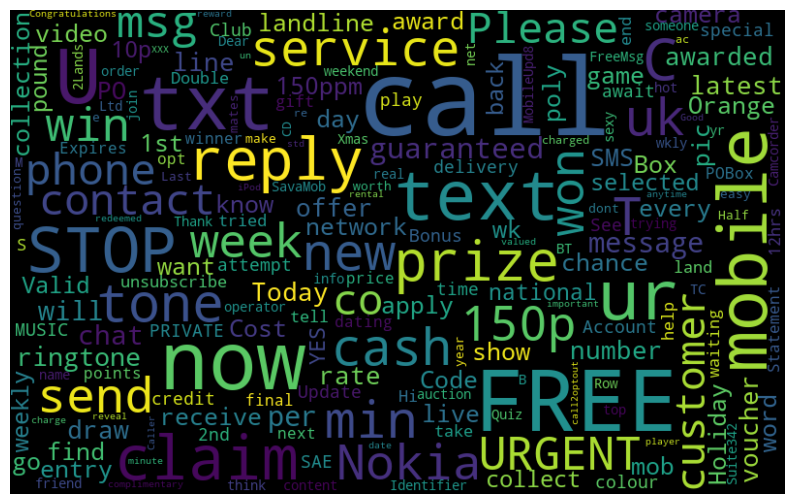

In [21]:
from wordcloud import WordCloud
fake_data = data[data["Category"] == 1]
all_words = ' '.join([text for text in fake_data.Message])
wordcloud = WordCloud(width= 800, height= 500,max_font_size = 110,collocations = False).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

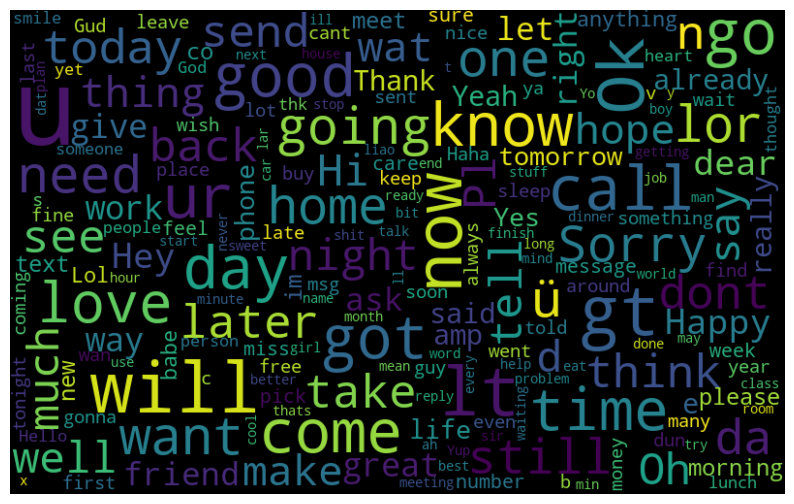

In [22]:
from wordcloud import WordCloud
real_data = data[data["Category"] == 0]
all_words = ' '.join([text for text in real_data.Message])
wordcloud = WordCloud(width= 800, height= 500,max_font_size = 110,collocations = False).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Implementing models on the Training Data and Testing Data

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
m1 = LogisticRegression()
m1.fit(X_train_features, y_train)

LogisticRegression()

In [25]:
print("Training Score is ", m1.score(X_train_features,y_train))
print("Testing Score is ", m1.score(X_test_features,y_test))

Training Score is  0.9685887368184878
Testing Score is  0.9757847533632287


In [26]:
from sklearn.metrics import accuracy_score

In [27]:
y_pred = m1.predict(X_train_features)
print("Accuracy for training data is",accuracy_score(y_pred,y_train)*100,"%")

Accuracy for training data is 96.85887368184878 %


In [28]:
y_pred_test = m1.predict(X_test_features)
print("Accuracy for testing data is ",accuracy_score(y_pred_test,y_test)*100,"%")

Accuracy for testing data is  97.57847533632287 %


### Making predictions using the Model

In [29]:
input_data = ["I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."]
# input_data = ['I HAVE A DATE ON SUNDAY WITH WILL!!']
# input_data = ["SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info"]
features_input_data = new_data.transform(input_data)
# Convert the input text to feature vectors

In [30]:
predicted_value = m1.predict(features_input_data)
if predicted_value[0] == 0:
    print("Predicted Value is 'Non Spam Email'")
else:
    print("Predicted Value is 'Spam Email'")

Predicted Value is 'Non Spam Email'
